## Import Libraris

In [1]:
## spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

In [2]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Start Spark Session

In [3]:
spark = SparkSession.builder.appName("Crminal").getOrCreate()
spark.sparkContext.setLogLevel('WARN')

23/01/03 04:11:40 WARN Utils: Your hostname, noureldin-virtual-machine resolves to a loopback address: 127.0.1.1; using 172.26.64.184 instead (on interface ens33)
23/01/03 04:11:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/03 04:11:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Data Description

About Dataset (on Kaggle, here: https://www.kaggle.com/djonafegnem/chicago-crime-data-analysis)
Context
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to 2017. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Research & Development Division of the Chicago Police Department at 312.745.6071 or RDAnalysis@chicagopolice.org. Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. The dataset contains more than 6,000,000 records/rows of data and cannot be viewed in full in Microsoft Excel. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

## Data Reading

In [4]:
!ls -lh

total 2.0G
-rw-rw-r-- 1 nour-eldin nour-eldin 909K ديس 31 02:30 chicago-crime-data-on-spark.ipynb
-rw-rw-r-- 1 nour-eldin nour-eldin 454M ديس 26 01:04 Chicago_Crimes_2001_to_2004.csv
-rw-rw-r-- 1 nour-eldin nour-eldin 450M سبت 20  2019 Chicago_Crimes_2005_to_2007.csv
-rw-rw-r-- 1 nour-eldin nour-eldin 647M سبت 20  2019 Chicago_Crimes_2008_to_2011.csv
-rw-rw-r-- 1 nour-eldin nour-eldin 350M سبت 20  2019 Chicago_Crimes_2012_to_2017.csv
-rw-rw-r-- 1 nour-eldin nour-eldin 109M ديس 26 05:10 SPARK.zip
-rwxr-xr-x 1 nour-eldin nour-eldin 883K ينا  3 03:52 Team3_Crime_Analysis.ipynb
-rwxr-xr-x 1 nour-eldin nour-eldin 879K ديس 27 16:23 Team3_Crime_Analysis_test.ipynb


In [5]:
df = spark.read.csv('*.csv', inferSchema=True, header=True)
# Caching this data frame as it's going to be read over and over again
df = df.cache()

In [6]:
# Printing dataframe schema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [7]:
# Dropping First Column as we see it is unreliable: 
df = df.drop("_c0")
# df.printSchema()

In [8]:
# Taking an initial look at the content of the data frame:
df.show(n=3, truncate=False)

23/01/03 04:18:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///home/nour-eldin/Spark_/chicago-crime-analysis-apache-spark-master/spark-ml/Chicago_Crimes_2001_to_2004.csv


+-------+-----------+----------------------+-------------------+----+--------------------------+-----------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID     |Case Number|Date                  |Block              |IUCR|Primary Type              |Description                  |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+-------+-----------+----------------------+-------------------+----+--------------------------+-----------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|4786321|HM399414   |01/01/2004 12:01:00 AM|08

## Data Exploration

In [9]:
print(df.count())

23/01/03 04:21:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///home/nour-eldin/Spark_/chicago-crime-analysis-apache-spark-master/spark-ml/Chicago_Crimes_2005_to_2007.csv


23/01/03 04:23:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///home/nour-eldin/Spark_/chicago-crime-analysis-apache-spark-master/spark-ml/Chicago_Crimes_2008_to_2011.csv
23/01/03 04:23:38 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 26.4 MiB so far)
23/01/03 04:23:38 WARN BlockManager: Persisting block rdd_13_5 to disk instead.
23/01/03 04:23:45 WARN MemoryStore: Not enough space to cache rdd_13_6 in memory! (computed 50.2 

23/01/03 04:24:19 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 26.4 MiB so far)


23/01/03 04:24:28 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)
23/01/03 04:24:28 WARN BlockManager: Persisting block rdd_13_8 to disk instead.
23/01/03 04:24:29 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 26.1 MiB so far)
23/01/03 04:24:29 WARN BlockManager: Persisting block rdd_13_7 to disk instead.
23/01/03 04:24:30 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)
23/01/03 04:24:30 WARN BlockManager: Persisting block rdd_13_9 to disk instead.
23/01/03 04:25:03 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 26.1 MiB so far)


23/01/03 04:25:05 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)
23/01/03 04:25:06 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)
23/01/03 04:25:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///home/nour-eldin/Spark_/chicago-crime-analysis-apache-spark-master/spark-ml/Chicago_Crimes_2012_to_2017.csv


23/01/03 04:25:15 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 26.0 MiB so far)
23/01/03 04:25:15 WARN BlockManager: Persisting block rdd_13_10 to disk instead.
23/01/03 04:25:16 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 25.7 MiB so far)
23/01/03 04:25:16 WARN BlockManager: Persisting block rdd_13_11 to disk instead.
23/01/03 04:25:16 WARN MemoryStore: Not enough space to cache rdd_13_12 in memory! (computed 26.0 MiB so far)
23/01/03 04:25:16 WARN BlockManager: Persisting block rdd_13_12 to disk instead.
23/01/03 04:25:39 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 26.0 MiB so far)


23/01/03 04:25:44 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 25.7 MiB so far)


23/01/03 04:25:45 WARN MemoryStore: Not enough space to cache rdd_13_12 in memory! (computed 26.0 MiB so far)


23/01/03 04:25:51 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 26.5 MiB so far)
23/01/03 04:25:51 WARN BlockManager: Persisting block rdd_13_13 to disk instead.
23/01/03 04:25:55 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 26.3 MiB so far)
23/01/03 04:25:55 WARN BlockManager: Persisting block rdd_13_14 to disk instead.
23/01/03 04:25:56 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 26.3 MiB so far)
23/01/03 04:25:56 WARN BlockManager: Persisting block rdd_13_15 to disk instead.
23/01/03 04:26:03 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 26.3 MiB so far)


23/01/03 04:26:05 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 26.3 MiB so far)


23/01/03 04:26:06 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 26.5 MiB so far)
7941286


In [10]:
df.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## We interested at first in te crime types and its counts

In [11]:
# Crime types and its count

crime_type_groups = df.groupBy('Primary Type').count()

In [12]:
crime_type_counts = crime_type_groups.orderBy('count', ascending=False)

In [13]:
crime_type_counts.show(truncate=False)

23/01/03 04:26:10 WARN MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 51.2 MiB so far)


23/01/03 04:26:11 WARN MemoryStore: Not enough space to cache rdd_13_6 in memory! (computed 25.5 MiB so far)


23/01/03 04:26:14 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)


23/01/03 04:26:14 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)
23/01/03 04:26:14 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 1568.5 KiB so far)


23/01/03 04:26:17 WARN MemoryStore: Not enough space to cache rdd_13_12 in memory! (computed 26.0 MiB so far)
23/01/03 04:26:17 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 26.5 MiB so far)


+--------------------------------+-------+
|Primary Type                    |count  |
+--------------------------------+-------+
|THEFT                           |1640506|
|BATTERY                         |1442717|
|CRIMINAL DAMAGE                 |923000 |
|NARCOTICS                       |885431 |
|OTHER OFFENSE                   |491923 |
|ASSAULT                         |481661 |
|BURGLARY                        |470958 |
|MOTOR VEHICLE THEFT             |370548 |
|ROBBERY                         |300453 |
|DECEPTIVE PRACTICE              |280931 |
|CRIMINAL TRESPASS               |229367 |
|PROSTITUTION                    |86401  |
|WEAPONS VIOLATION               |77429  |
|PUBLIC PEACE VIOLATION          |58548  |
|OFFENSE INVOLVING CHILDREN      |51441  |
|CRIM SEXUAL ASSAULT             |29868  |
|SEX OFFENSE                     |28707  |
|GAMBLING                        |18806  |
|LIQUOR LAW VIOLATION            |17513  |
|INTERFERENCE WITH PUBLIC OFFICER|15710  |
+----------

These are the top 20 most frequent crime types

In [14]:
# Convert the dataframe to pandas, so we can visualize data with seaborn library

counts_pddf = crime_type_counts.toPandas()
# counts_pddf = pd.DataFrame(crime_type_counts.rdd.map(lambda l: l.asDict()).collect())
counts_pddf.head(10)

23/01/03 04:26:21 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)
23/01/03 04:26:21 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 51.4 MiB so far)
23/01/03 04:26:21 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 51.0 MiB so far)


23/01/03 04:26:22 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 51.2 MiB so far)
23/01/03 04:26:23 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 82.6 MiB so far)


23/01/03 04:26:24 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 50.6 MiB so far)
23/01/03 04:26:24 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 50.1 MiB so far)


23/01/03 04:26:25 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 50.6 MiB so far)
23/01/03 04:26:25 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 50.5 MiB so far)


23/01/03 04:26:26 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 26.3 MiB so far)
23/01/03 04:26:26 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 50.8 MiB so far)


,Primary Type,count
0,THEFT,1640506
1,BATTERY,1442717
2,CRIMINAL DAMAGE,923000
3,NARCOTICS,885431
4,OTHER OFFENSE,491923
5,ASSAULT,481661
6,BURGLARY,470958
7,MOTOR VEHICLE THEFT,370548
8,ROBBERY,300453
9,DECEPTIVE PRACTICE,280931


#### Visualize crime types vs its count

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

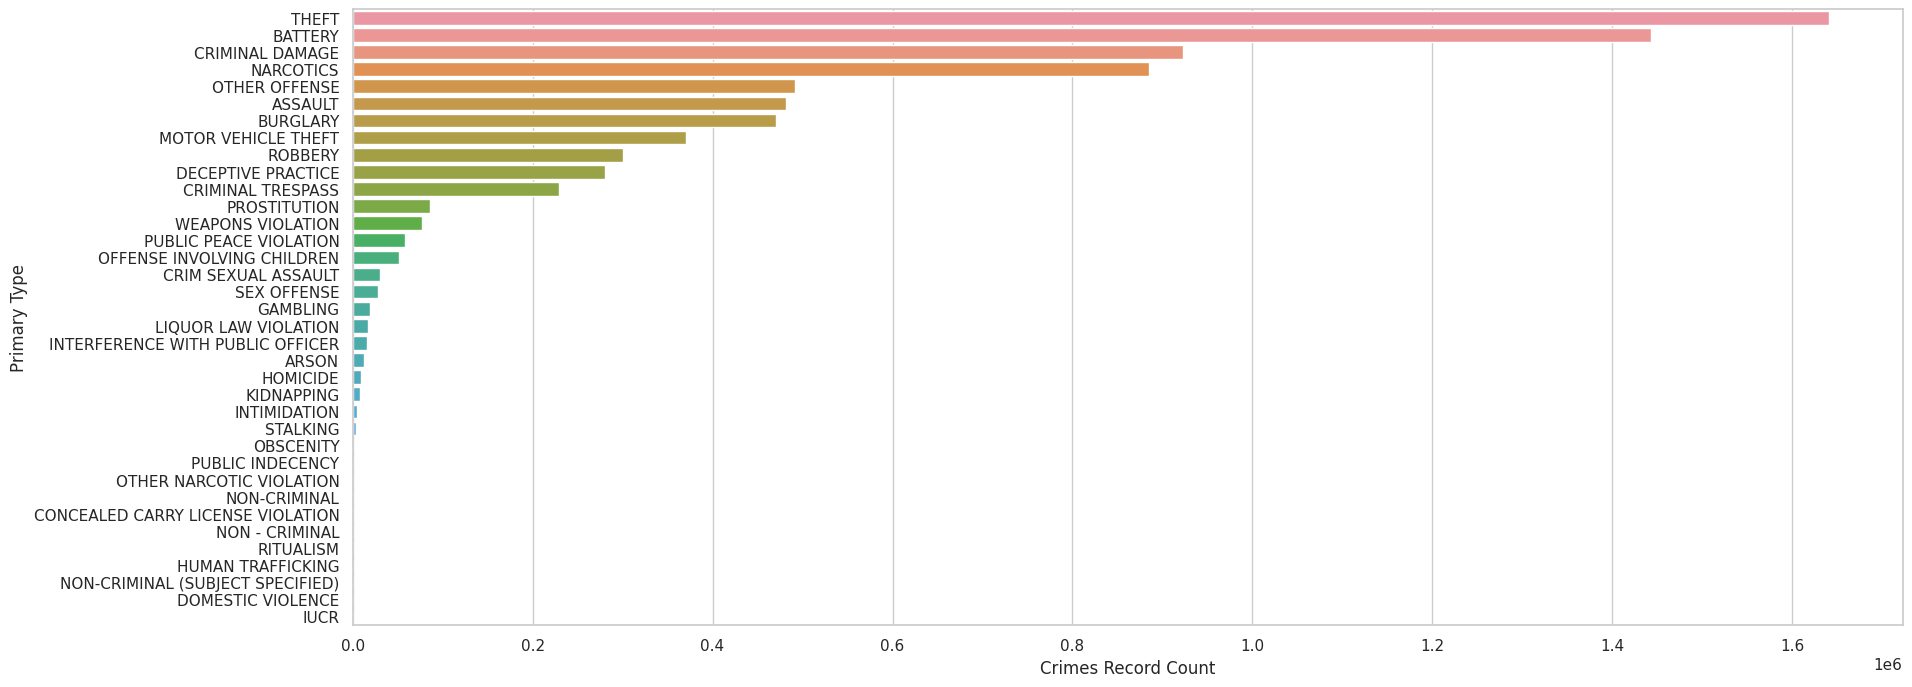

In [15]:
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='Primary Type', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

In [16]:
import datetime
from pyspark.sql.functions import *

### Here we interested in the time when the crimes happened

In [17]:
df.select("Date").show(5)

23/01/03 04:26:30 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 51.1 MiB so far)
+--------------------+
|                Date|
+--------------------+
|01/01/2004 12:01:...|
|03/01/2003 12:00:...|
|06/20/2004 11:00:...|
|12/30/2004 08:00:...|
|05/01/2003 01:00:...|
+--------------------+
only showing top 5 rows



In [18]:
# Splitting our dataframe ('date'), so we can work on hours separately

df = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY'))

df.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

23/01/03 04:26:31 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 51.1 MiB so far)
+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|01/01/2004 12:01:00 AM|2004-01-01 00:01:00|2004-01-01|
|03/01/2003 12:00:00 AM|2003-03-01 00:00:00|2003-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows



### What time of the day are ciminal the busiest?

In [19]:
# Extract the "hour" field from the date into a separate column called "hour"
df_hour = df.withColumn('hour', hour(df['date_time']))

# Derive a data frame with crime counts per hour of the day:
hourly_count = df_hour.groupBy(['Primary Type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

hourly_count_pddf = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())

23/01/03 04:26:32 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)
23/01/03 04:26:32 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 26.7 MiB so far)


23/01/03 04:26:32 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 51.0 MiB so far)


23/01/03 04:26:39 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 26.4 MiB so far)
23/01/03 04:26:39 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 51.2 MiB so far)


23/01/03 04:26:42 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 50.6 MiB so far)
23/01/03 04:26:42 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)


23/01/03 04:26:46 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 50.6 MiB so far)
23/01/03 04:26:46 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 50.5 MiB so far)
23/01/03 04:26:46 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 50.1 MiB so far)


In [20]:
hourly_count_pddf = hourly_count_pddf.sort_values(by='hour')

/tmp/ipykernel_19413/1538506202.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both', axis='y')


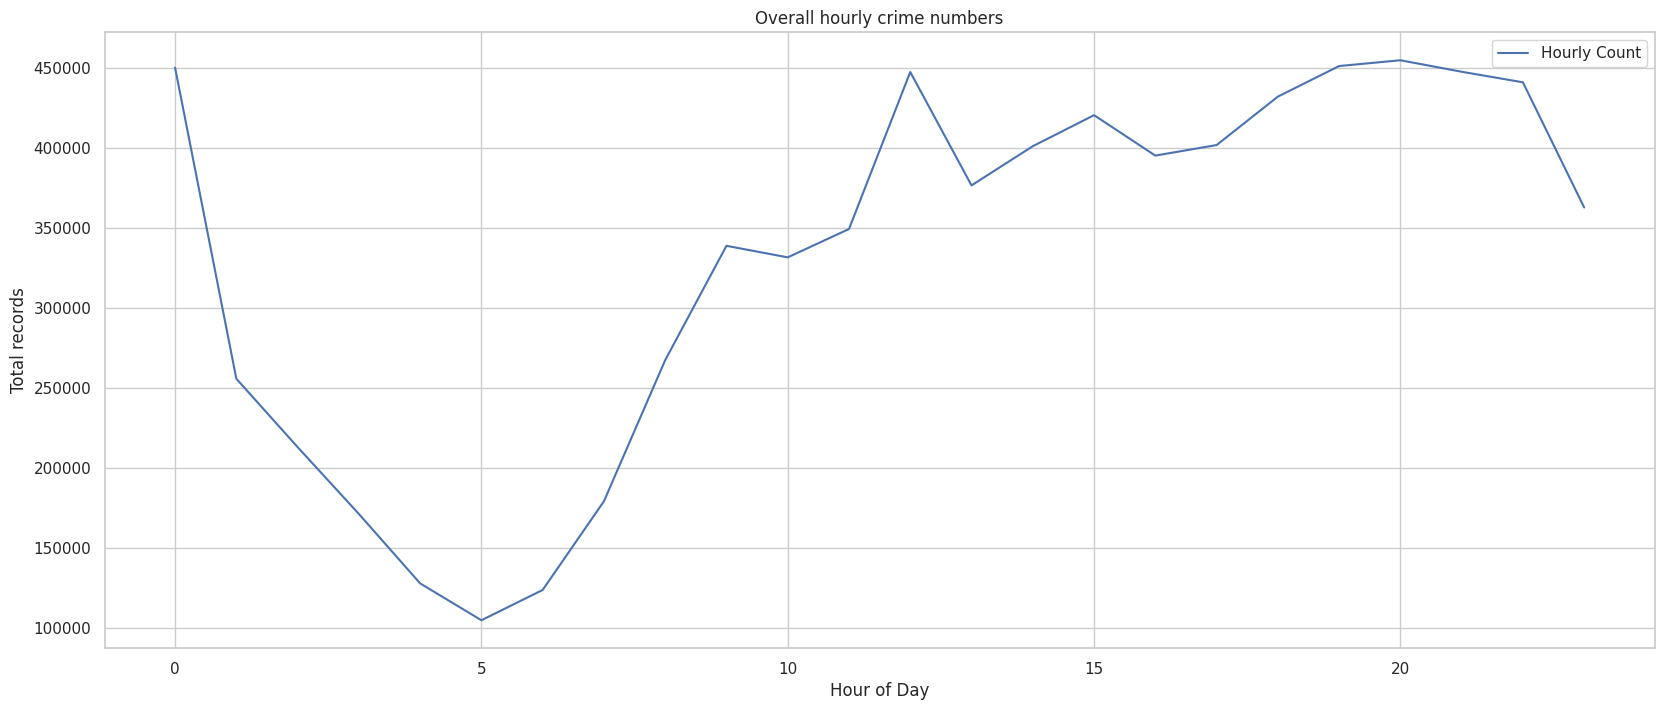

In [21]:
fig, ax = plt.subplots()
ax.plot(hourly_count_pddf['hour'], hourly_count_pddf['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()

Seems that 18-22 are the worst hours...

### We should know the crime types versus the arrest over years

In [22]:
# crime types and arrest over years:

type_arrest_date = df.groupBy(['Arrest', 'Year'])\
                     .count()\
                     .orderBy(['Year', 'count'], ascending=[True, False])
print()
type_arrest_date.show(8, truncate=False)


23/01/03 04:27:05 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)
23/01/03 04:27:05 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 26.7 MiB so far)
23/01/03 04:27:05 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 26.3 MiB so far)


23/01/03 04:27:08 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 26.4 MiB so far)
23/01/03 04:27:08 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 26.4 MiB so far)


23/01/03 04:27:09 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 26.1 MiB so far)


23/01/03 04:27:10 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)
23/01/03 04:27:10 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)


23/01/03 04:27:11 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 26.0 MiB so far)


23/01/03 04:27:12 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 25.7 MiB so far)


+------+----+------+
|Arrest|Year|count |
+------+----+------+
|False |2001|400628|
|True  |2001|167889|
|False |2002|348074|
|True  |2002|142805|
|False |2003|334414|
|True  |2003|141499|
|False |2004|271524|
|True  |2004|116681|
+------+----+------+
only showing top 8 rows



In [23]:
# A pandas data frame of the collected dictionary version of the date-grouped DF above

# type_arrest_pddf = type_arrest_date.toPandas()
# type_arrest_pddf.head(10)

type_arrest_pddf = pd.DataFrame(type_arrest_date.rdd.map(lambda l: l.asDict()).collect())
# print(type_arrest_date.rdd.map(lambda l: l.asDict()).collect())
type_arrest_pddf


23/01/03 04:27:14 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 26.3 MiB so far)
23/01/03 04:27:14 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 26.7 MiB so far)
23/01/03 04:27:14 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)


23/01/03 04:27:15 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 26.4 MiB so far)
23/01/03 04:27:15 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 26.4 MiB so far)


23/01/03 04:27:16 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 26.1 MiB so far)
23/01/03 04:27:17 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)
23/01/03 04:27:17 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)


23/01/03 04:27:18 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 26.0 MiB so far)


23/01/03 04:27:18 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 25.7 MiB so far)


,Arrest,Year,count
0,False,2001,400628
1,True,2001,167889
2,False,2002,348074
3,True,2002,142805
4,False,2003,334414
5,True,2003,141499
6,False,2004,271524
7,True,2004,116681
8,False,2005,314652
9,True,2005,141159


In [24]:
type_arrest_pddf['yearpd'] = type_arrest_pddf['Year']
type_arrest_pddf['Arrest'] = type_arrest_pddf['Arrest'].apply(lambda l: l=='True')
type_arrest_pddf.head(10)

,Arrest,Year,count,yearpd
0,False,2001,400628,2001
1,True,2001,167889,2001
2,False,2002,348074,2002
3,True,2002,142805,2002
4,False,2003,334414,2003
5,True,2003,141499,2003
6,False,2004,271524,2004
7,True,2004,116681,2004
8,False,2005,314652,2005
9,True,2005,141159,2005


In [25]:
type_arrest_pddf = type_arrest_pddf.drop(type_arrest_pddf.index[9])
type_arrest_pddf = type_arrest_pddf.drop(type_arrest_pddf.index[8])
type_arrest_pddf.head(10)

,Arrest,Year,count,yearpd
0,False,2001,400628,2001
1,True,2001,167889,2001
2,False,2002,348074,2002
3,True,2002,142805,2002
4,False,2003,334414,2003
5,True,2003,141499,2003
6,False,2004,271524,2004
7,True,2004,116681,2004
10,False,2006,550904,2006
11,True,2006,243781,2006


### Now visualize see how have arrests evolved over the 16 years?

/tmp/ipykernel_19413/1718493087.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both', axis='y')


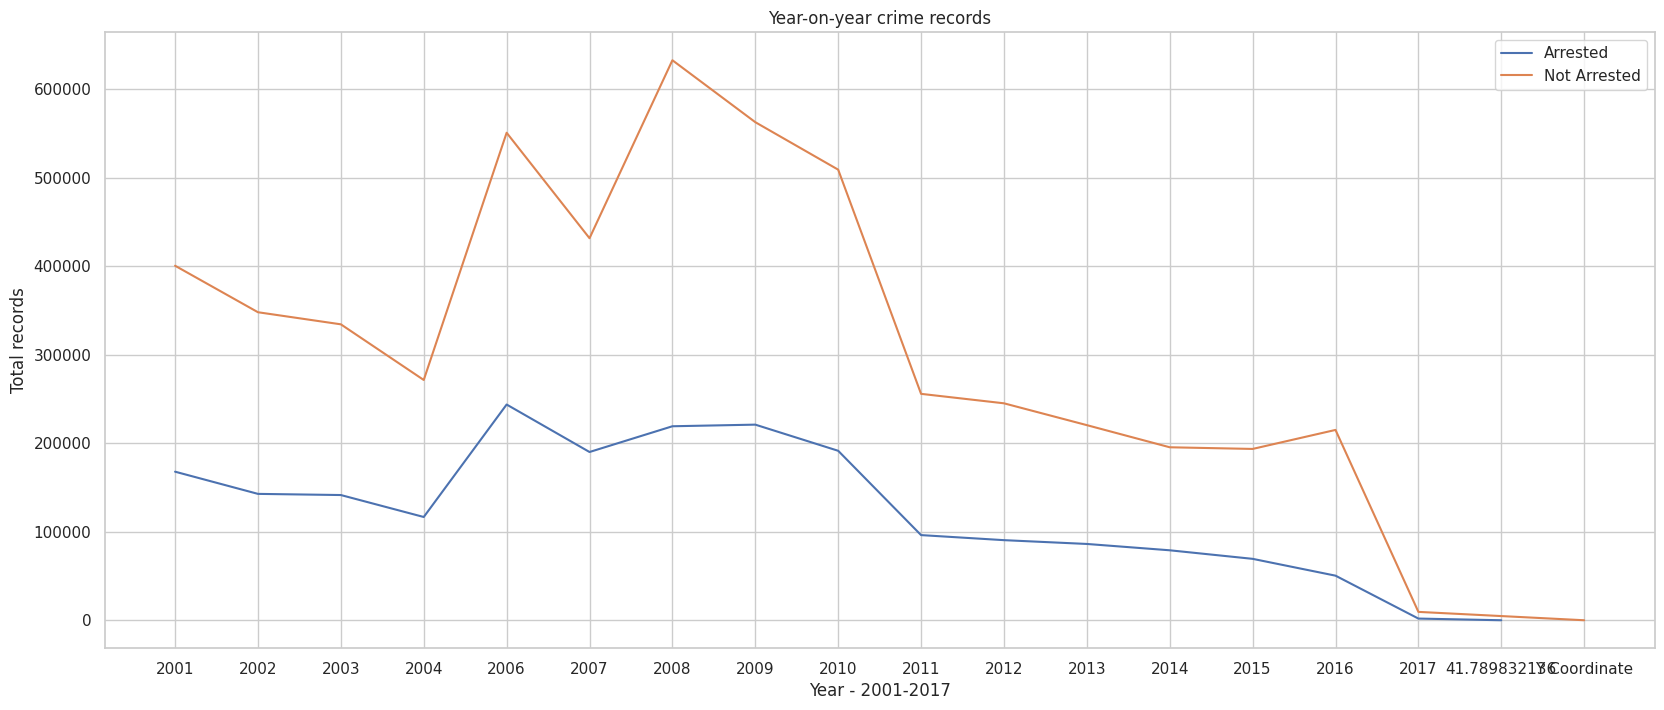

In [26]:
# Data for plotting
t = type_arrest_pddf['count'] - 20 # np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['Year']

arrested = type_arrest_pddf[type_arrest_pddf['Arrest'] == True]
not_arrested = type_arrest_pddf[type_arrest_pddf['Arrest'] == False]

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(arrested['Year'], arrested['count'], label='Arrested')
ax.plot(not_arrested['Year'], not_arrested['count'], label='Not Arrested')

ax.set(xlabel='Year - 2001-2017', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()

It looks like the relative distance between arrests and non-arrests has remained constant..

### Types of locations with crime entries

### Domestic crimes:

In [27]:
domestic_hour = pd.DataFrame(df_hour.groupBy(['domestic', 'hour']).count().orderBy('hour').rdd.map(lambda row: row.asDict()).collect())

23/01/03 04:27:22 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)
23/01/03 04:27:22 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 26.3 MiB so far)
23/01/03 04:27:22 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 26.7 MiB so far)


23/01/03 04:27:26 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 26.4 MiB so far)
23/01/03 04:27:27 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 26.4 MiB so far)


23/01/03 04:27:30 WARN MemoryStore: Not enough space to cache rdd_13_7 in memory! (computed 26.1 MiB so far)
23/01/03 04:27:30 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 25.4 MiB so far)


23/01/03 04:27:33 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 26.1 MiB so far)


23/01/03 04:27:34 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 26.0 MiB so far)
23/01/03 04:27:34 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 25.7 MiB so far)


In [28]:
dom = domestic_hour[domestic_hour['domestic'] == 'True']['count']
non_dom = domestic_hour[domestic_hour['domestic'] == 'False']['count']

either_dom = domestic_hour.groupby(by=['hour']).sum()['count']

dom_keys = domestic_hour[domestic_hour['domestic'] == 'False']['hour']

/tmp/ipykernel_19413/1983350014.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  either_dom = domestic_hour.groupby(by=['hour']).sum()['count']


#### How do domestic crimes compare the other crimes?

/tmp/ipykernel_19413/2284381936.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axes.grid(b=True)


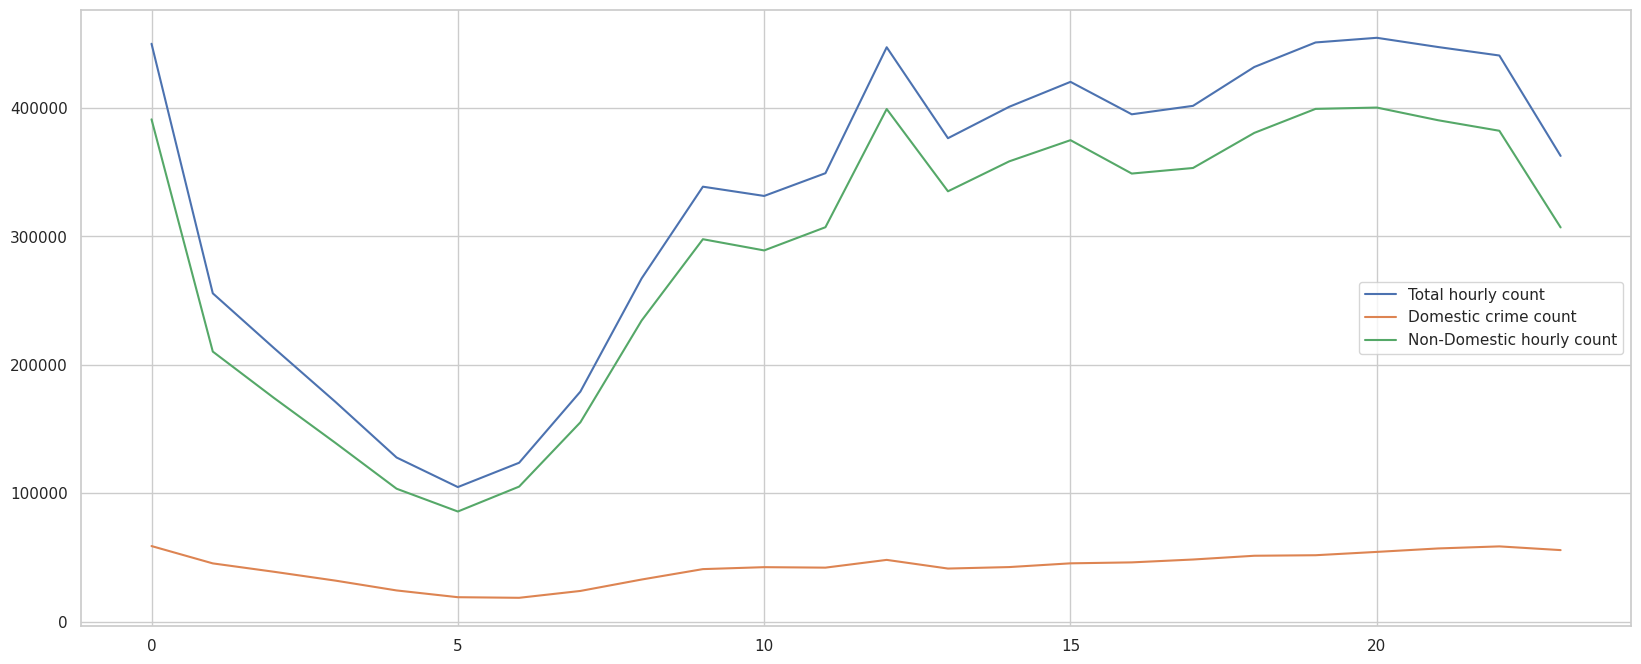

In [29]:
# Visualization

figure, axes = plt.subplots()

axes.plot(dom_keys, either_dom, label='Total hourly count')
axes.plot(dom_keys, dom, label='Domestic crime count')
axes.plot(dom_keys, non_dom, label='Non-Domestic hourly count')

axes.legend()
axes.grid(b=True)

### A closer look at crime date and time

The information given here indicates when the crime is perpetrated. The date/time field may be able to draw a meaningful trend that can be used to predict crime. However, I believe that this leads much more to external factors, such as policy changes, law inforcement-related factors, and so on.

It's much more likely that time-related features that are more closely relatable to crime occurence be better predictors than the date and time. I mean, knowing the month of the year, the day of the week, and the hour of the day that the crime occurred can enable better chances of predicting accurately than simply knowing "when" AD crimes occurred.

Adding predictors (so far fields) that read time information:

 * hour of day (already added the 'hour' field)
 * day of week
 * month of year
 * day in a range. Instead of using the entire date-time, we'll use a "day sequence" that is counted from 2001-01-01.

In [30]:
df_dates = df_hour.withColumn('week_day', dayofweek(df_hour['date_time']))\
                 .withColumn('year_month', month(df_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_hour['date_time']))\
                 .withColumn('date_number', datediff(df['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

23/01/03 04:27:42 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [31]:
df_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

23/01/03 04:27:42 WARN MemoryStore: Not enough space to cache rdd_13_0 in memory! (computed 26.1 MiB so far)


+----------------------+----------+----+--------+----+----------+---------+-----------+
|date                  |month     |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
|01/01/2004 12:01:00 AM|2004-01-01|0   |5       |2004|1         |1        |1095       |
|03/01/2003 12:00:00 AM|2003-01-01|0   |7       |2003|3         |1        |789        |
|06/20/2004 11:00:00 AM|2004-01-01|11  |1       |2004|6         |20       |1266       |
|12/30/2004 08:00:00 PM|2004-01-01|20  |5       |2004|12        |30       |1459       |
|05/01/2003 01:00:00 AM|2003-01-01|1   |5       |2003|5         |1        |850        |
|08/01/2004 12:01:00 AM|2004-01-01|0   |1       |2004|8         |1        |1308       |
|01/01/2001 11:00:00 AM|2001-01-01|11  |2       |2001|1         |1        |0          |
|03/15/2003 12:00:00 AM|2003-01-01|0   |7       |2003|3         |15       |803        |
|09/16/2004 10:00:00 AM|2004-01-

## Day of week crime levels

In [32]:
week_day_crime_counts = df_dates.groupBy('week_day').count()

#Convert dataframe to pandas
week_day_crime_counts_pddf = pd.DataFrame(week_day_crime_counts.orderBy('week_day').rdd.map(lambda e: e.asDict()).collect())

23/01/03 04:27:57 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 26.3 MiB so far)
23/01/03 04:27:57 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 26.7 MiB so far)


23/01/03 04:29:00 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)
23/01/03 04:29:00 WARN BlockManager: Persisting block rdd_127_5 to disk instead.
23/01/03 04:29:00 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:29:00 WARN BlockManager: Persisting block rdd_127_6 to disk instead.


23/01/03 04:30:06 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:30:06 WARN BlockManager: Persisting block rdd_127_10 to disk instead.


<AxesSubplot: xlabel='week_day', ylabel='count'>

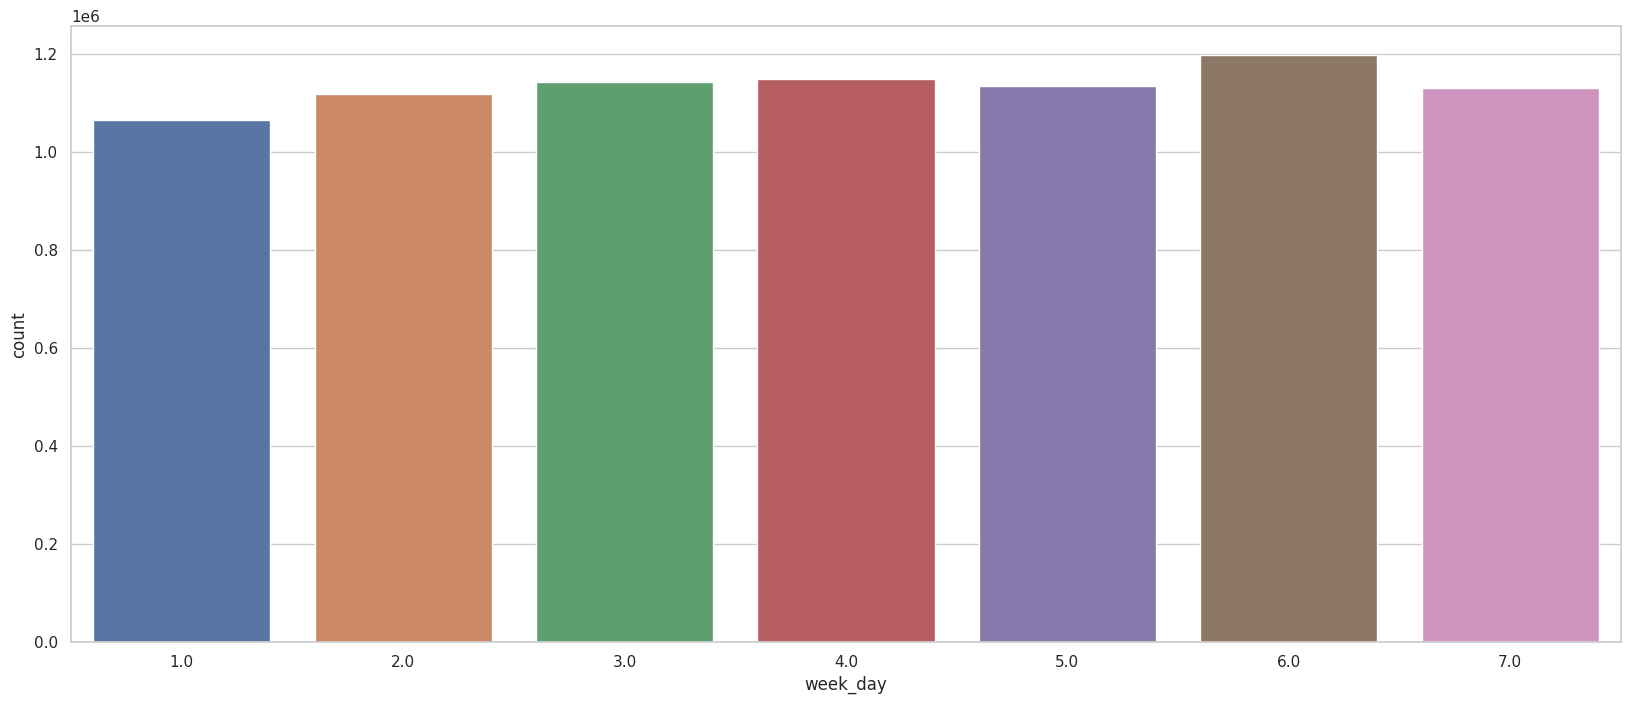

In [33]:
# Visualization

sns.barplot(data=week_day_crime_counts_pddf, x='week_day', y='count')

It seems intriguing that the're little variance...

## Month of year

In [34]:
year_month_crime_counts = df_dates.groupBy('year_month').count()

#Convert dataframe to pandas
year_month_crime_counts_pddf = pd.DataFrame(year_month_crime_counts.orderBy('year_month').rdd.map(lambda e: e.asDict()).collect())

23/01/03 04:31:52 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)


23/01/03 04:31:56 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 92.6 MiB so far)


23/01/03 04:32:04 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:32:05 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)
23/01/03 04:32:05 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)


23/01/03 04:32:17 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:32:17 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:32:19 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:32:19 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:32:20 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:32:20 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


In [35]:
year_month_crime_counts_pddf

,year_month,count
0,NaN,1
1,1.0,660357
2,2.0,564178
3,3.0,639692
4,4.0,649755
5,5.0,730039
6,6.0,711768
7,7.0,730949
8,8.0,724522
9,9.0,679295


<AxesSubplot: xlabel='year_month', ylabel='count'>

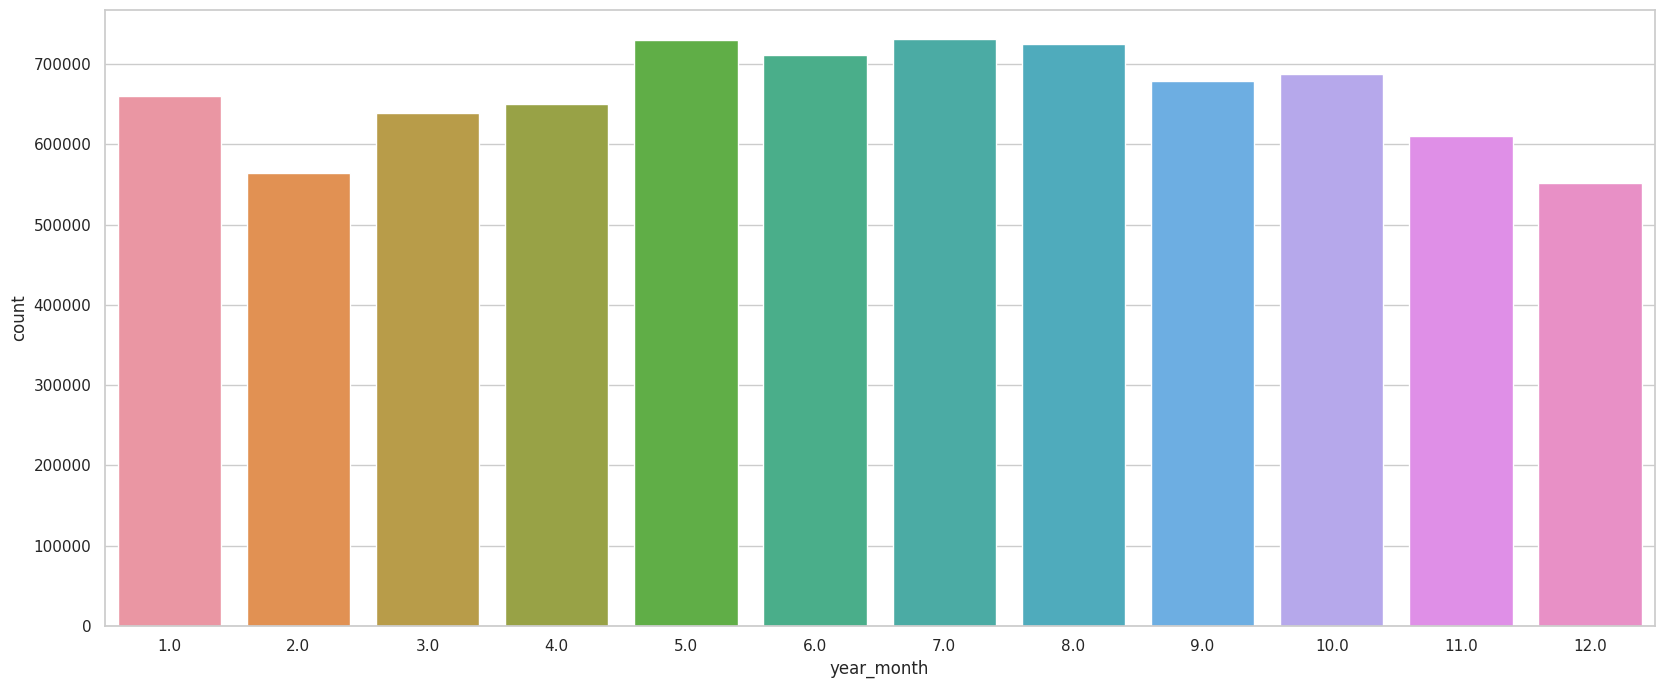

In [36]:
# Visualize crime rate versus month

sns.barplot(data=year_month_crime_counts_pddf, y='count', x='year_month')

It seems that May-August are the busiest months for criminals...

## Day of month

In [37]:
month_day_crime_counts = df_dates.groupBy('month_day').count()

#Convert dataframe to pandas
month_day_crime_counts_pddf = pd.DataFrame(month_day_crime_counts.orderBy('month_day').rdd.map(lambda e: e.asDict()).collect())


23/01/03 04:32:23 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:32:24 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:32:25 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:32:26 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)
23/01/03 04:32:26 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:32:27 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)


23/01/03 04:32:27 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:32:29 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:32:29 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)


23/01/03 04:32:30 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:32:30 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


In [38]:
month_day_crime_counts_pddf.sort_values(by='count', ascending=False).head(10)

,month_day,count
1,1.0,309994
15,15.0,271113
20,20.0,264762
10,10.0,263976
14,14.0,263507
12,12.0,263193
17,17.0,261727
9,9.0,261387
16,16.0,261078
8,8.0,260775


#### Visualize worst days of the month

/tmp/ipykernel_19413/3809536883.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both')


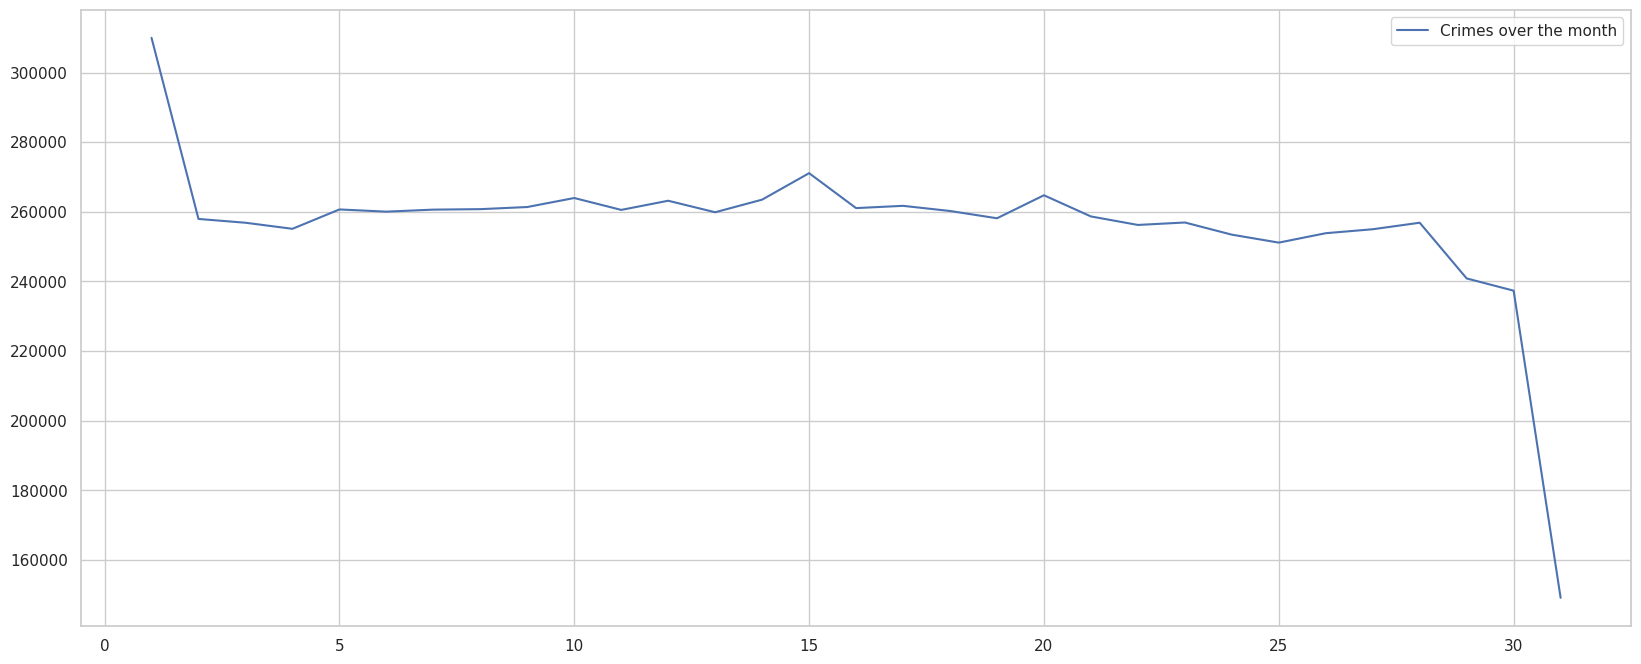

In [39]:
month_day_crime_counts_pddf = month_day_crime_counts_pddf.sort_values(by='month_day', ascending=True)

fg, ax = plt.subplots()

ax.plot(month_day_crime_counts_pddf['month_day'], month_day_crime_counts_pddf['count'], label='Crimes over the month')

ax.grid(b=True, which='both')
ax.legend()

# Predict the primary type of crime using Spark MLlibraries

### Excluded variables:

 * 'id' - Random information that isn't a predictor of crime type
 * 'case_number' - Random information that isn't a predictor of crime type
 * 'date' - Removed because it's been re-featurized in other features generated above
 * 'block' - Excluded as this may simply mean noise
 * 'iucr' - Excluded as correlated with crime type. No point.
 * 'x_coordinate' - Not included
 * 'y_coordinate' - Not included
 * 'year' - Not included (already otherwise featurized)
 * 'updated_on' - not included
 * 'latitude' - not included
 * 'longitude' - not included
 * 'location' - not included
 * 'date_time' - Taken into account in other time-related features
 * 'description' - Excluded. I want to see this as associated with the response (primary type)


### Selected predictors:

 * 'location_description'
 * 'arrest'
 * 'domestic'
 * 'beat'
 * 'district'
 * 'ward'
 * 'community_area'
 * 'fbi_code'
 * 'hour'
 * 'week_day'
 * 'year_month'
 * 'month_day'
 * 'date_number'

In [40]:
selected_features = [
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'hour',
 'week_day',
 'year_month',
 'month_day',
 'date_number']

In [41]:
df_dates.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- month: date (nullable = true)
 |-- hour: integer (nullabl

In [42]:
#Let's see the schema of these selected features:

features_df = df_dates.select(selected_features)
features_df.printSchema()

root
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- week_day: integer (nullable = true)
 |-- year_month: integer (nullable = true)
 |-- month_day: integer (nullable = true)
 |-- date_number: integer (nullable = true)



Let's try to see all level counts in all the selected features...

In [43]:
feature_level_count_dic = []

for feature in selected_features:
    print('Analysing %s' % feature)
    levels_list_df = features_df.select(feature).distinct()
    feature_level_count_dic.append({'feature': feature, 'level_count': levels_list_df.count()})


Analysing Location Description


23/01/03 04:32:39 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:32:41 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:32:43 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:32:43 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:32:44 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:32:45 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)
23/01/03 04:32:45 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:32:47 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:32:47 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:32:47 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:32:49 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing Arrest


23/01/03 04:32:51 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:32:52 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)
23/01/03 04:32:52 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:32:53 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:32:53 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:32:54 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:32:55 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:32:55 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:32:55 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:32:56 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)
23/01/03 04:32:56 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing Domestic


23/01/03 04:32:58 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:32:58 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)


23/01/03 04:32:59 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:00 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:33:00 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:33:01 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:33:01 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:33:01 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:02 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:33:02 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)
23/01/03 04:33:02 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Analysing Beat
23/01/03 04:33:03 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:33:04 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:33:05 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)
23/01/03 04:33:05 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:06 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:06 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)
23/01/03 04:33:06 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:33:07 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:33:07 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:33:07 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:33:08 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing District
23/01/03 04:33:09 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:09 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:33:09 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:33:10 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:33:11 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:33:11 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:12 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:13 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:33:13 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)


23/01/03 04:33:13 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:33:14 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing Ward


23/01/03 04:33:16 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:16 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)


23/01/03 04:33:17 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)
23/01/03 04:33:18 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:18 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:33:19 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)
23/01/03 04:33:19 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:33:20 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:33:21 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)
23/01/03 04:33:21 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:22 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing Community Area
23/01/03 04:33:23 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:33:23 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:33:24 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)
23/01/03 04:33:24 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:24 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:25 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)
23/01/03 04:33:25 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:33:25 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:33:26 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:26 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:26 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


Analysing FBI Code
23/01/03 04:33:32 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:32 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:32 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:33:34 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:33:34 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:33:34 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:33:35 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:33:35 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:36 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:37 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)
23/01/03 04:33:37 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Analysing hour
23/01/03 04:33:39 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:33:39 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:33:39 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:33:40 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:33:40 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:33:42 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:33:42 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)
23/01/03 04:33:42 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:33:42 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:33:43 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:43 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Analysing week_day
23/01/03 04:33:44 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:44 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:33:45 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:33:46 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:33:46 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:33:46 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:47 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:47 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:48 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:33:48 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:48 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Analysing year_month
23/01/03 04:33:50 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:50 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:50 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:51 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:33:51 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:33:51 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:33:52 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:33:53 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:33:53 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:33:53 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:33:54 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Analysing month_day
23/01/03 04:33:55 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
23/01/03 04:33:55 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)


23/01/03 04:33:55 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:33:56 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:33:56 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:33:56 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:33:57 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:33:57 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:33:57 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:33:58 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:33:58 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Analysing date_number
23/01/03 04:34:00 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:00 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:34:01 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)
23/01/03 04:34:01 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)


23/01/03 04:34:02 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)


23/01/03 04:34:03 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:34:03 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)


23/01/03 04:34:04 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)


23/01/03 04:34:05 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:34:05 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)
23/01/03 04:34:05 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


In [44]:
pd.DataFrame(feature_level_count_dic).sort_values(by='level_count', ascending=False)

,feature,level_count
12,date_number,5863
3,Beat,305
0,Location Description,174
6,Community Area,80
5,Ward,52
11,month_day,32
4,District,28
7,FBI Code,27
8,hour,25
10,year_month,13


### Preparing model

In [45]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
df_dates_features = df_dates.na.drop(subset=selected_features)

Using Spark's string indexer to index selected features

In [46]:
for feature in feature_level_count_dic:
    indexer = StringIndexer(inputCol=feature['feature'], outputCol='%s_indexed' % feature['feature'])
    print('Fitting feature "%s"' % feature['feature'])
    model = indexer.fit(df_dates_features)
    print('Transforming "%s"' % feature['feature'])
    df_dates_features = model.transform(df_dates_features)

Fitting feature "Location Description"
23/01/03 04:34:08 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:11 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 28.1 MiB so far)
23/01/03 04:34:11 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:34:12 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:34:12 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:34:12 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:34:13 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:34:14 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:34:14 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:34:15 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:34:16 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "Location Description"
Fitting feature "Arrest"


23/01/03 04:34:20 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:21 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:34:21 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:34:22 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:34:22 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:34:23 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:34:24 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:34:24 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:34:25 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:34:26 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:34:26 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "Arrest"
Fitting feature "Domestic"


23/01/03 04:34:29 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:31 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)
23/01/03 04:34:31 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:34:32 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:34:33 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:34:33 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 04:34:34 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)


23/01/03 04:34:35 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:34:35 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:34:35 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:34:36 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Transforming "Domestic"
Fitting feature "Beat"


23/01/03 04:34:39 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:41 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:34:41 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:34:43 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:34:44 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:34:44 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:34:45 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:34:46 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:34:46 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:34:47 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:34:48 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "Beat"
Fitting feature "District"


23/01/03 04:34:50 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:34:52 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)
23/01/03 04:34:52 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:34:53 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:34:53 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:34:54 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:34:55 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)


23/01/03 04:34:56 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:34:56 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)
23/01/03 04:34:56 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:34:57 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Transforming "District"
Fitting feature "Ward"
23/01/03 04:34:59 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:00 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:35:00 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:35:02 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:35:02 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:35:02 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:35:04 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:35:04 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:35:04 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:35:05 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:35:06 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Transforming "Ward"
Fitting feature "Community Area"
23/01/03 04:35:07 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:09 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:35:09 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:35:10 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:35:11 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:35:11 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:35:12 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:35:12 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:35:12 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:35:13 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:35:14 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Transforming "Community Area"
Fitting feature "FBI Code"
23/01/03 04:35:16 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:17 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:35:17 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:35:18 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:35:19 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:35:19 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:35:20 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)


23/01/03 04:35:22 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:35:22 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:35:23 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 04:35:25 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Transforming "FBI Code"
Fitting feature "hour"


23/01/03 04:35:29 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:31 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)
23/01/03 04:35:31 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:35:32 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:35:33 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:35:33 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:35:35 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:35:35 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:35:35 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:35:37 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)
23/01/03 04:35:37 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "hour"
Fitting feature "week_day"
23/01/03 04:35:41 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:42 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:35:42 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:35:45 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 04:35:45 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:35:45 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:35:48 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)
23/01/03 04:35:48 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:35:49 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:35:51 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)
23/01/03 04:35:51 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Transforming "week_day"
Fitting feature "year_month"


23/01/03 04:35:55 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:35:58 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:35:58 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:35:59 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:35:59 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 04:36:00 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:36:01 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:36:02 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:36:02 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:36:03 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:36:04 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "year_month"
Fitting feature "month_day"
23/01/03 04:36:06 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:36:08 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:36:08 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:36:09 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:36:10 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:36:10 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:36:11 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:36:12 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:36:12 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)


23/01/03 04:36:13 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:36:14 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


Transforming "month_day"
Fitting feature "date_number"
23/01/03 04:36:16 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:36:18 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:36:18 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:36:19 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:36:20 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:36:20 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:36:22 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:36:22 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:36:23 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:36:24 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:36:25 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


Transforming "date_number"


Now let's do the same with the label

In [47]:
## String-index the response variable:
response_indexer = StringIndexer(inputCol='Primary Type', outputCol='primary_type_indexed')
response_model = response_indexer.fit(df_dates_features)
df_dates_features = response_model.transform(df_dates_features)

23/01/03 04:36:26 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:36:28 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)
23/01/03 04:36:28 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)
23/01/03 04:36:30 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)


23/01/03 04:36:31 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 53.7 MiB so far)
23/01/03 04:36:31 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 04:36:32 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 27.8 MiB so far)


23/01/03 04:36:33 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 53.6 MiB so far)


23/01/03 04:36:34 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


23/01/03 04:36:36 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


23/01/03 04:36:37 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 54.0 MiB so far)


In [48]:
#lets see the data...
df_dates_features.show(1)

23/01/03 04:36:40 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)
+-------+-----------+--------------------+-----------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-------------------+----------+----+--------+----------+---------+-----------+----------------------------+--------------+----------------+------------+----------------+------------+----------------------+----------------+------------+----------------+------------------+-----------------+-------------------+--------------------+
|     ID|Case Number|                Date|            Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|          date_time|     month|hour|week_

Let's vectorize the features

We use a vector assembler to vectorize all predictors into a `features` column

In [49]:
indexed_features = ['%s_indexed' % fc['feature'] for fc in feature_level_count_dic]
indexed_features

['Location Description_indexed',
 'Arrest_indexed',
 'Domestic_indexed',
 'Beat_indexed',
 'District_indexed',
 'Ward_indexed',
 'Community Area_indexed',
 'FBI Code_indexed',
 'hour_indexed',
 'week_day_indexed',
 'year_month_indexed',
 'month_day_indexed',
 'date_number_indexed']

In [50]:
assembler = VectorAssembler(inputCols=indexed_features, outputCol='features')
vectorized_df_dates = assembler.transform(df_dates_features)

In [51]:
vectorized_df_dates.select('features').take(1)

23/01/03 04:36:43 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


[Row(features=DenseVector([1.0, 0.0, 0.0, 45.0, 5.0, 15.0, 19.0, 0.0, 0.0, 3.0, 9.0, 0.0, 1134.0]))]

### Now let's train the model.

We're using **60%** to **40%** split between the train and the test datasets

Let's try to train a logistic regression and see its performance and accuracy.

In [52]:
train, test = vectorized_df_dates.randomSplit([0.6, 0.4])

In [53]:
from pyspark.ml.classification import LogisticRegression

In [54]:
logisticRegression = LogisticRegression(labelCol='primary_type_indexed', featuresCol='features', maxIter=10, family='multinomial')

In [55]:
fittedModel = logisticRegression.fit(train)

23/01/03 04:36:46 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:37:01 WARN MemoryStore: Not enough space to cache rdd_127_3 in memory! (computed 54.7 MiB so far)


23/01/03 04:38:30 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 86.2 MiB so far)


23/01/03 04:39:22 WARN MemoryStore: Not enough space to cache rdd_127_2 in memory! (computed 88.7 MiB so far)
23/01/03 04:39:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/03 04:39:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/01/03 04:39:25 WARN MemoryStore: Not enough space to cache rdd_127_3 in memory! (computed 89.0 MiB so far)


23/01/03 04:39:40 WARN MemoryStore: Not enough space to cache rdd_483_3 in memory! (computed 33.0 MiB so far)
23/01/03 04:39:40 WARN BlockManager: Persisting block rdd_483_3 to disk instead.


23/01/03 04:39:43 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 27.1 MiB so far)


23/01/03 04:40:21 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:40:52 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/01/03 04:40:52 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


23/01/03 04:40:55 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


23/01/03 04:40:55 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)


23/01/03 04:40:59 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


23/01/03 04:41:00 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)


23/01/03 04:41:04 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)
23/01/03 04:41:04 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)


23/01/03 04:41:09 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)
23/01/03 04:41:09 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


23/01/03 04:41:14 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 17.0 MiB so far)
23/01/03 04:41:14 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 33.0 MiB so far)


23/01/03 04:41:22 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)
23/01/03 04:41:22 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)


23/01/03 04:41:28 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)
23/01/03 04:41:28 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)


23/01/03 04:41:37 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)
23/01/03 04:41:37 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


23/01/03 04:41:47 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)
23/01/03 04:41:47 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


23/01/03 04:41:58 WARN MemoryStore: Not enough space to cache rdd_483_11 in memory! (computed 17.0 MiB so far)
23/01/03 04:41:58 WARN MemoryStore: Not enough space to cache rdd_483_10 in memory! (computed 33.0 MiB so far)


## Model performance

In [56]:
fittedModel.summary.accuracy

23/01/03 04:42:08 WARN MemoryStore: Not enough space to cache rdd_127_3 in memory! (computed 54.7 MiB so far)


23/01/03 04:42:40 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:43:05 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


0.6255654068753199

In [57]:
model_summary = fittedModel.summary

In [58]:
fittedModel.coefficientMatrix

DenseMatrix(34, 13, [0.009, -1.3049, 0.1137, 0.0003, -0.0015, 0.0043, -0.0019, -3.4321, ..., 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0], 1)

#### Why the 30X13 shape?

That's because the multinomial logistic regression is fitted on **each class** of the label. It computes the probability of each class and then predicts based on these probabilities.

In [59]:
print(fittedModel.coefficientMatrix)

DenseMatrix([[ 9.04668246e-03, -1.30488339e+00,  1.13732063e-01,
               3.36636223e-04, -1.51699093e-03,  4.26625425e-03,
              -1.89333430e-03, -3.43212553e+00,  2.40070309e-03,
               1.23441436e-02, -6.52011267e-03,  1.19076685e-03,
               3.19025915e-06],
             [ 5.20025891e-03, -1.10353276e+00,  3.48689270e+00,
               1.05622641e-04, -8.24491139e-03, -5.83534462e-03,
              -3.76614814e-03, -8.27415938e-01,  1.32679726e-02,
               4.26920825e-02, -1.41633486e-02,  3.76712020e-03,
              -3.03686832e-05],
             [-6.92676283e-03, -2.41387288e+00,  5.30189055e-01,
              -8.56765379e-04, -2.55943957e-02,  9.73977998e-03,
               2.63842937e-04, -1.20951425e+00,  1.43036205e-02,
               4.43726452e-02, -9.59961893e-03,  4.20284513e-03,
              -4.02912547e-05],
             [-3.24538918e-02,  8.39804527e+00, -3.92419909e+00,
              -8.71513754e-04, -1.43415127e-02, -2.87157031

In [60]:
print('Coefficient matrix:\nRow count = %s\nCol count = %s' % (fittedModel.coefficientMatrix.numRows, fittedModel.coefficientMatrix.numCols))

Coefficient matrix:
Row count = 34
Col count = 13


In [61]:
print('Model:\nNum Classes = %s\nNum Features = %s' % (fittedModel.numClasses, fittedModel.numFeatures))

Model:
Num Classes = 34
Num Features = 13


In [62]:
print('Training "primary_type" factor level count = %s' % train.select('primary_type_indexed').distinct().count())

23/01/03 04:44:05 WARN MemoryStore: Not enough space to cache rdd_127_2 in memory! (computed 54.3 MiB so far)
23/01/03 04:44:05 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 54.2 MiB so far)


23/01/03 04:44:05 WARN MemoryStore: Not enough space to cache rdd_127_1 in memory! (computed 89.2 MiB so far)


23/01/03 04:44:45 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:45:05 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)
23/01/03 04:45:05 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 85.8 MiB so far)


Training "primary_type" factor level count = 34


So our `randomSplit` call to split train/test data sets took some primary types to only either of the two parts

In [63]:
vectorized_df_dates.select('features').show(2, truncate=False)

+------------------------------------------------------------+
|features                                                    |
+------------------------------------------------------------+
|[1.0,0.0,0.0,45.0,5.0,15.0,19.0,0.0,0.0,3.0,9.0,0.0,1134.0] |
|[1.0,0.0,1.0,128.0,7.0,29.0,15.0,4.0,0.0,4.0,8.0,0.0,1590.0]|
+------------------------------------------------------------+
only showing top 2 rows



In [64]:
fittedModel.numClasses

34

In [65]:
fittedModel.numFeatures

13

In [66]:
train.select('primary_type_indexed').distinct().count()

23/01/03 04:45:53 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:46:14 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 86.4 MiB so far)


23/01/03 04:46:25 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)


34

In [67]:
df_dates.select('Primary Type').distinct().count()

23/01/03 04:46:53 WARN MemoryStore: Not enough space to cache rdd_127_2 in memory! (computed 54.3 MiB so far)
23/01/03 04:46:53 WARN MemoryStore: Not enough space to cache rdd_127_1 in memory! (computed 54.9 MiB so far)
23/01/03 04:46:53 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 92.6 MiB so far)


23/01/03 04:46:55 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)
23/01/03 04:46:55 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)
23/01/03 04:46:55 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 04:46:55 WARN MemoryStore: Not enough space to cache rdd_127_10 in memory! (computed 27.5 MiB so far)
23/01/03 04:46:56 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 27.3 MiB so far)
23/01/03 04:46:56 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:46:57 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)
23/01/03 04:46:57 WARN MemoryStore: Not enough space to cache rdd_127_13 in memory! (computed 28.1 MiB so far)


36

In [68]:
fittedModel.interceptVector.values.size

34

In [69]:
print(model_summary.objectiveHistory)
print() 
print('Objective history size ', len(model_summary.objectiveHistory))

[2.4075810428842477, 2.099327374625788, 1.8112302027261473, 1.6523773052145478, 1.5528452846896081, 1.4752463171925068, 1.4108447267437871, 1.3664873218141254, 1.3335197143534345, 1.3119842035977773, 1.2947635725054631]

Objective history size  11


<AxesSubplot: >

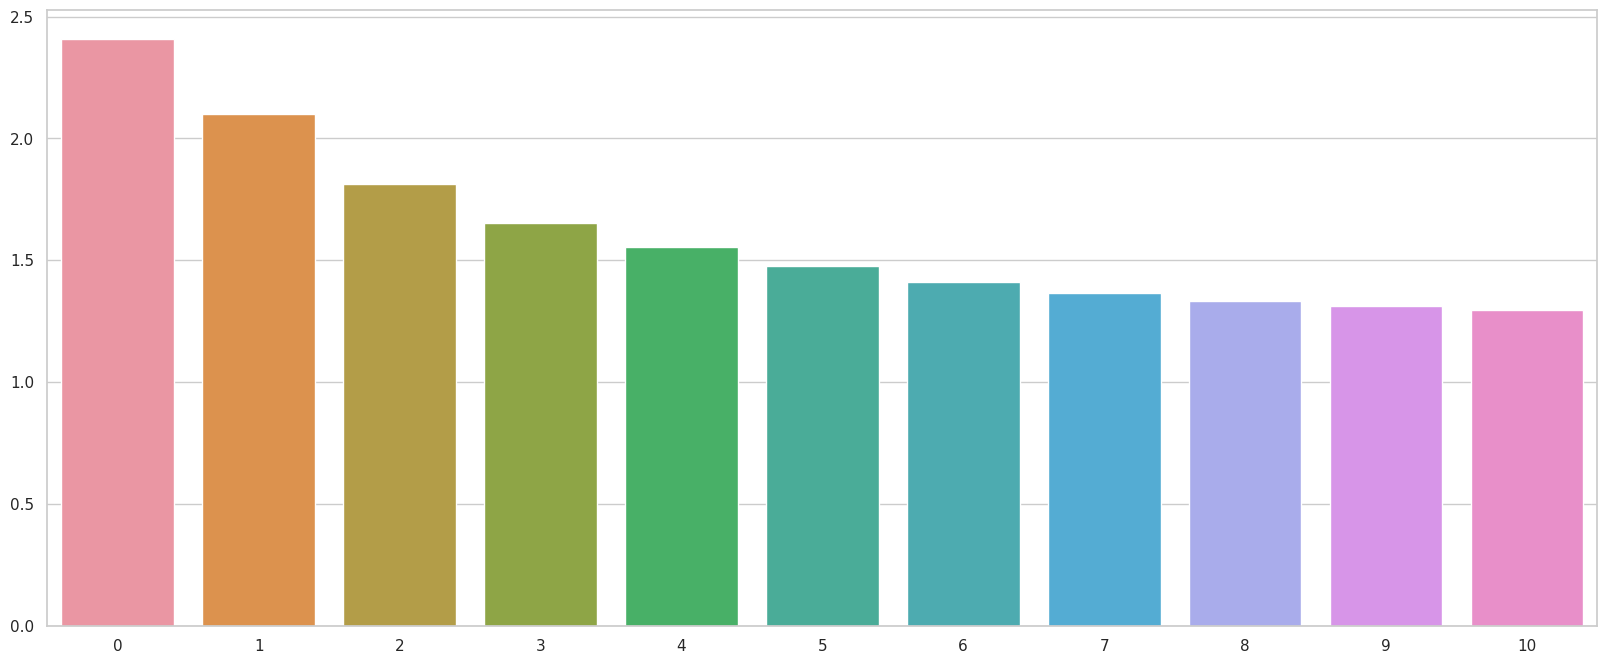

In [70]:
sns.barplot(y=model_summary.objectiveHistory, x=list(range(len(model_summary.objectiveHistory))))

In [71]:
label_stats = {float(i):{'index': float(i)} for i in range(34)}
print(label_stats)

{0.0: {'index': 0.0}, 1.0: {'index': 1.0}, 2.0: {'index': 2.0}, 3.0: {'index': 3.0}, 4.0: {'index': 4.0}, 5.0: {'index': 5.0}, 6.0: {'index': 6.0}, 7.0: {'index': 7.0}, 8.0: {'index': 8.0}, 9.0: {'index': 9.0}, 10.0: {'index': 10.0}, 11.0: {'index': 11.0}, 12.0: {'index': 12.0}, 13.0: {'index': 13.0}, 14.0: {'index': 14.0}, 15.0: {'index': 15.0}, 16.0: {'index': 16.0}, 17.0: {'index': 17.0}, 18.0: {'index': 18.0}, 19.0: {'index': 19.0}, 20.0: {'index': 20.0}, 21.0: {'index': 21.0}, 22.0: {'index': 22.0}, 23.0: {'index': 23.0}, 24.0: {'index': 24.0}, 25.0: {'index': 25.0}, 26.0: {'index': 26.0}, 27.0: {'index': 27.0}, 28.0: {'index': 28.0}, 29.0: {'index': 29.0}, 30.0: {'index': 30.0}, 31.0: {'index': 31.0}, 32.0: {'index': 32.0}, 33.0: {'index': 33.0}}


In [72]:
print("False positive rate by label:")

False positive rate by label:


In [73]:
for i, rate in enumerate(model_summary.falsePositiveRateByLabel):
    label_stats[i]['false_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.truePositiveRateByLabel):
    label_stats[i]['true_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.precisionByLabel):
    label_stats[i]['precision_rate'] = rate
    
for i, rate in enumerate(model_summary.recallByLabel):
    label_stats[i]['recall_rate'] = rate
    
for i, rate in enumerate(model_summary.fMeasureByLabel()):
    label_stats[i]['f_measure'] = rate

In [74]:
train_rdd = train.select(['Primary Type', 'primary_type_indexed']).distinct().orderBy('primary_type_indexed').rdd.map(lambda l: l.asDict()).collect()

23/01/03 04:46:59 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 27.8 MiB so far)
23/01/03 04:46:59 WARN MemoryStore: Not enough space to cache rdd_127_1 in memory! (computed 28.5 MiB so far)
23/01/03 04:46:59 WARN MemoryStore: Not enough space to cache rdd_127_2 in memory! (computed 54.3 MiB so far)


23/01/03 04:47:20 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 54.4 MiB so far)


23/01/03 04:47:38 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)


23/01/03 04:47:56 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


In [75]:
for l in train_rdd:
    print(l)
    label_stats[l['primary_type_indexed']]['Primary Type'] = l['Primary Type']

{'Primary Type': 'THEFT', 'primary_type_indexed': 0.0}
{'Primary Type': 'BATTERY', 'primary_type_indexed': 1.0}
{'Primary Type': 'CRIMINAL DAMAGE', 'primary_type_indexed': 2.0}
{'Primary Type': 'NARCOTICS', 'primary_type_indexed': 3.0}
{'Primary Type': 'OTHER OFFENSE', 'primary_type_indexed': 4.0}
{'Primary Type': 'ASSAULT', 'primary_type_indexed': 5.0}
{'Primary Type': 'BURGLARY', 'primary_type_indexed': 6.0}
{'Primary Type': 'MOTOR VEHICLE THEFT', 'primary_type_indexed': 7.0}
{'Primary Type': 'ROBBERY', 'primary_type_indexed': 8.0}
{'Primary Type': 'DECEPTIVE PRACTICE', 'primary_type_indexed': 9.0}
{'Primary Type': 'CRIMINAL TRESPASS', 'primary_type_indexed': 10.0}
{'Primary Type': 'PROSTITUTION', 'primary_type_indexed': 11.0}
{'Primary Type': 'WEAPONS VIOLATION', 'primary_type_indexed': 12.0}
{'Primary Type': 'PUBLIC PEACE VIOLATION', 'primary_type_indexed': 13.0}
{'Primary Type': 'OFFENSE INVOLVING CHILDREN', 'primary_type_indexed': 14.0}
{'Primary Type': 'CRIM SEXUAL ASSAULT', 'pr

In [76]:
rates_pddf = pd.DataFrame(list(label_stats.values()))

In [77]:
rates_pddf = rates_pddf.sort_values(by='precision_rate', ascending=False)

#### This model seem to be so good at predicting theft?

In [78]:
rates_pddf

,index,false_positive_rate,true_positive_rate,precision_rate,recall_rate,f_measure,Primary Type
0,0.0,0.032677,0.982787,0.887135,0.982787,0.932515,THEFT
14,14.0,0.000490,0.208581,0.741754,0.208581,0.325603,OFFENSE INVOLVING CHILDREN
2,2.0,0.048422,0.825407,0.691808,0.825407,0.752726,CRIMINAL DAMAGE
3,3.0,0.060221,0.968823,0.669242,0.968823,0.791638,NARCOTICS
6,6.0,0.035479,0.815655,0.594477,0.815655,0.687720,BURGLARY
1,1.0,0.085238,0.395778,0.505649,0.395778,0.444018,BATTERY
7,7.0,0.031636,0.638712,0.493669,0.638712,0.556901,MOTOR VEHICLE THEFT
10,10.0,0.006811,0.186529,0.449144,0.186529,0.263589,CRIMINAL TRESPASS
5,5.0,0.032737,0.371022,0.421261,0.371022,0.394548,ASSAULT
11,11.0,0.009958,0.663860,0.418801,0.663860,0.513596,PROSTITUTION


## Accuracy:

In [80]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.util import MLUtils

In [83]:
predictions = fittedModel.transform(test)

In [84]:
evaluator = MulticlassClassificationEvaluator(labelCol="primary_type_indexed", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

23/01/03 04:52:03 WARN MemoryStore: Not enough space to cache rdd_127_9 in memory! (computed 53.7 MiB so far)


23/01/03 04:52:21 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


23/01/03 04:52:25 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 53.6 MiB so far)


Test set accuracy = 0.6259647464662522


# Naive Model

In [85]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes( modelType="multinomial" ,featuresCol='features'
                ,labelCol = "primary_type_indexed")

model = nb.fit(train)


23/01/03 04:52:51 WARN MemoryStore: Not enough space to cache rdd_127_0 in memory! (computed 92.6 MiB so far)


23/01/03 04:53:06 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


23/01/03 04:53:10 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


### Model performance

In [86]:
predictions = model.transform(test)

In [87]:
evaluator = MulticlassClassificationEvaluator(labelCol="primary_type_indexed", predictionCol="prediction",
                                              metricName="accuracy")
accuracy2 = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy2))

23/01/03 04:54:43 WARN MemoryStore: Not enough space to cache rdd_127_4 in memory! (computed 54.7 MiB so far)


23/01/03 04:54:44 WARN MemoryStore: Not enough space to cache rdd_127_5 in memory! (computed 28.2 MiB so far)


Test set accuracy = 0.10052570089422351


# KMeans

In [100]:
from pyspark.ml.clustering import KMeans

In [119]:
kmeans = KMeans(k=34,featuresCol='features'
                )

kmeans.setSeed(1)

KMeans_38d72bdaecac

In [120]:
kmeans.setMaxIter(10)

KMeans_38d72bdaecac

In [121]:
kmeans.clear(kmeans.maxIter)

model = kmeans.fit(train)

model.getDistanceMeasure()

23/01/03 05:22:15 WARN MemoryStore: Not enough space to cache rdd_127_1 in memory! (computed 89.2 MiB so far)
23/01/03 05:22:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_127_1 in memory.
23/01/03 05:22:15 WARN MemoryStore: Not enough space to cache rdd_127_1 in memory! (computed 384.0 B so far)


23/01/03 05:24:06 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)
23/01/03 05:24:07 WARN MemoryStore: Not enough space to cache rdd_127_6 in memory! (computed 53.4 MiB so far)


23/01/03 05:25:13 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 40.7 MiB so far)
23/01/03 05:25:13 WARN BlockManager: Persisting block rdd_730_7 to disk instead.


23/01/03 05:25:23 WARN MemoryStore: Not enough space to cache rdd_730_9 in memory! (computed 40.7 MiB so far)
23/01/03 05:25:23 WARN BlockManager: Persisting block rdd_730_9 to disk instead.
23/01/03 05:25:25 WARN MemoryStore: Not enough space to cache rdd_730_9 in memory! (computed 40.7 MiB so far)


23/01/03 05:25:25 WARN MemoryStore: Not enough space to cache rdd_127_12 in memory! (computed 27.5 MiB so far)


23/01/03 05:26:21 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_730_7 in memory.
23/01/03 05:26:21 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 384.0 B so far)
23/01/03 05:26:21 WARN MemoryStore: Not enough space to cache rdd_730_6 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:23 WARN MemoryStore: Not enough space to cache rdd_730_8 in memory! (computed 27.1 MiB so far)
23/01/03 05:26:23 WARN MemoryStore: Not enough space to cache rdd_730_9 in memory! (computed 18.1 MiB so far)


23/01/03 05:26:24 WARN MemoryStore: Not enough space to cache rdd_730_10 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:25 WARN MemoryStore: Not enough space to cache rdd_730_11 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:26 WARN MemoryStore: Not enough space to cache rdd_730_6 in memory! (computed 18.1 MiB so far)
23/01/03 05:26:26 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 12.1 MiB so far)
23/01/03 05:26:26 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_730_7 in memory.
23/01/03 05:26:26 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 384.0 B so far)
23/01/03 05:26:28 WARN MemoryStore: Not enough space to cache rdd_730_6 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:30 WARN MemoryStore: Not enough space to cache rdd_730_9 in memory! (computed 40.7 MiB so far)
23/01/03 05:26:31 WARN MemoryStore: Not enough space to cache rdd_730_10 in memory! (computed 18.1 MiB so far)
23/01/03 05:26:31 WARN MemoryStore: Not enough space to cache rdd_730_11 in memory! (computed 7.9 MiB so far)
23/01/03 05:26:31 WARN MemoryStore: Not enough space to cache rdd_730_9 in memory! (computed 5.2 MiB so far)
23/01/03 05:26:31 WARN MemoryStore: Not enough space to cache rdd_730_11 in memory! (computed 12.0 MiB so far)
23/01/03 05:26:32 WARN MemoryStore: Not enough space to cache rdd_730_10 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:34 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)
23/01/03 05:26:34 WARN MemoryStore: Not enough space to cache rdd_730_14 in memory! (computed 18.1 MiB so far)
23/01/03 05:26:35 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)
23/01/03 05:26:35 WARN MemoryStore: Not enough space to cache rdd_730_14 in memory! (computed 18.1 MiB so far)


23/01/03 05:26:39 WARN MemoryStore: Not enough space to cache rdd_730_6 in memory! (computed 40.7 MiB so far)


23/01/03 05:26:42 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 40.7 MiB so far)


23/01/03 05:26:45 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 27.1 MiB so far)


23/01/03 05:26:47 WARN MemoryStore: Not enough space to cache rdd_730_6 in memory! (computed 27.1 MiB so far)
23/01/03 05:26:48 WARN MemoryStore: Not enough space to cache rdd_730_5 in memory! (computed 40.7 MiB so far)


23/01/03 05:26:51 WARN MemoryStore: Not enough space to cache rdd_730_8 in memory! (computed 40.7 MiB so far)


23/01/03 05:26:54 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 12.0 MiB so far)


23/01/03 05:26:57 WARN MemoryStore: Not enough space to cache rdd_730_14 in memory! (computed 27.1 MiB so far)
23/01/03 05:26:58 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 12.0 MiB so far)


23/01/03 05:27:00 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)
23/01/03 05:27:00 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 40.7 MiB so far)


23/01/03 05:27:03 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:06 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 2.3 MiB so far)
23/01/03 05:27:06 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)


23/01/03 05:27:07 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 18.1 MiB so far)


23/01/03 05:27:08 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:08 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:27:08 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)


23/01/03 05:27:11 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:12 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:12 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)


23/01/03 05:27:13 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:14 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:27:15 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:15 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:17 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:18 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:18 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:20 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:21 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:21 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:21 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)


23/01/03 05:27:25 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:27:26 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:26 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)


23/01/03 05:27:27 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:29 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:29 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:29 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:31 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:27:31 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:31 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 3.5 MiB so far)


23/01/03 05:27:33 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:34 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:34 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)


23/01/03 05:27:35 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:37 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:38 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:38 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:39 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:40 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:40 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)


23/01/03 05:27:40 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:42 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:27:43 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)


23/01/03 05:27:44 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:45 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:46 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:46 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:47 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:49 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:50 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:50 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)


23/01/03 05:27:52 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:53 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)
23/01/03 05:27:53 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:27:53 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)


23/01/03 05:27:55 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:27:56 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 7.9 MiB so far)
23/01/03 05:27:56 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:57 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:27:58 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:27:58 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 18.1 MiB so far)
23/01/03 05:27:59 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:00 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:28:01 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 7.9 MiB so far)


23/01/03 05:28:01 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:02 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:03 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:03 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)


23/01/03 05:28:04 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:05 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:05 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:06 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:07 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:08 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:08 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:08 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:11 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:11 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 5.2 MiB so far)
23/01/03 05:28:11 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 5.2 MiB so far)


23/01/03 05:28:13 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:14 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:14 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:15 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:18 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:19 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)
23/01/03 05:28:20 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:22 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:23 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)


23/01/03 05:28:23 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 18.1 MiB so far)
23/01/03 05:28:24 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:27 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:27 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:29 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:30 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:32 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:32 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:32 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:35 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:35 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:35 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:36 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:37 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:37 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:37 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:39 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:39 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:39 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 3.5 MiB so far)


23/01/03 05:28:40 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:41 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:41 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:41 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:42 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 5.2 MiB so far)
23/01/03 05:28:42 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:43 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:44 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:45 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:45 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:45 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:46 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:28:47 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)
23/01/03 05:28:47 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)


23/01/03 05:28:48 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:48 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:48 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:48 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 12.0 MiB so far)


23/01/03 05:28:50 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)
23/01/03 05:28:50 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 5.2 MiB so far)
23/01/03 05:28:50 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 5.2 MiB so far)


23/01/03 05:28:51 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:52 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 7.9 MiB so far)
23/01/03 05:28:52 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 18.1 MiB so far)


23/01/03 05:28:53 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:54 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:28:54 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)
23/01/03 05:28:54 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 18.1 MiB so far)


23/01/03 05:28:55 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:56 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)
23/01/03 05:28:56 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 18.1 MiB so far)
23/01/03 05:28:56 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 18.1 MiB so far)


23/01/03 05:28:57 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:28:58 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)


23/01/03 05:28:59 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)


23/01/03 05:28:59 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 27.1 MiB so far)


23/01/03 05:29:00 WARN MemoryStore: Not enough space to cache rdd_730_1 in memory! (computed 12.0 MiB so far)
23/01/03 05:29:00 WARN MemoryStore: Not enough space to cache rdd_730_2 in memory! (computed 12.0 MiB so far)


23/01/03 05:29:00 WARN MemoryStore: Not enough space to cache rdd_730_3 in memory! (computed 27.1 MiB so far)


23/01/03 05:29:01 WARN MemoryStore: Not enough space to cache rdd_730_7 in memory! (computed 27.2 MiB so far)


23/01/03 05:29:02 WARN MemoryStore: Not enough space to cache rdd_730_13 in memory! (computed 18.1 MiB so far)


23/01/03 05:29:02 WARN MemoryStore: Not enough space to cache rdd_730_12 in memory! (computed 27.1 MiB so far)
23/01/03 05:29:02 WARN MemoryStore: Not enough space to cache rdd_730_15 in memory! (computed 7.9 MiB so far)


23/01/03 05:29:06 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:06 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


23/01/03 05:29:07 WARN MemoryStore: Not enough space to cache rdd_127_3 in memory! (computed 28.1 MiB so far)
23/01/03 05:29:07 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBas

23/01/03 05:29:20 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:22 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


23/01/03 05:29:23 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:23 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:26 WARN RowBasedKeyValueBatch: Calling spill() on

23/01/03 05:29:40 WARN MemoryStore: Not enough space to cache rdd_127_7 in memory! (computed 27.6 MiB so far)


23/01/03 05:29:41 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 53.3 MiB so far)
23/01/03 05:29:41 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:42 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


23/01/03 05:29:44 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:44 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:46 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:46 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:47 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:29:49 WARN RowBasedKeyValueBatch: Calling spill() on

23/01/03 05:30:01 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 85.8 MiB so far)
23/01/03 05:30:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:04 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


23/01/03 05:30:06 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:11 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:14 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:14 WARN RowBasedKeyValueBatch: Calling spill() on

23/01/03 05:30:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:31 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


23/01/03 05:30:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:34 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:34 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:34 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/01/03 05:30:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


'euclidean'

In [122]:
model.setPredictionCol("newPrediction")

KMeansModel: uid=KMeans_38d72bdaecac, k=34, distanceMeasure=euclidean, numFeatures=13

In [123]:
model.predict(test.head().features)

1

In [124]:
centers = model.clusterCenters()

len(centers)

34

In [125]:
transformed = model.transform(test).select("features", "newPrediction")

rows = transformed.collect()

rows[0].newPrediction == rows[1].newPrediction

23/01/03 05:30:51 WARN MemoryStore: Not enough space to cache rdd_127_3 in memory! (computed 28.1 MiB so far)


23/01/03 05:31:39 WARN MemoryStore: Not enough space to cache rdd_127_8 in memory! (computed 27.0 MiB so far)


23/01/03 05:31:58 WARN MemoryStore: Not enough space to cache rdd_127_11 in memory! (computed 53.0 MiB so far)


True

In [126]:
rows[2].newPrediction == rows[3].newPrediction

True

In [127]:
model.hasSummary

True

In [128]:
summary = model.summary

summary.k

34

In [129]:
summary.clusterSizes

[158904,
 106795,
 118889,
 130790,
 72219,
 169963,
 130567,
 96760,
 129323,
 130173,
 137954,
 176148,
 130830,
 116279,
 128124,
 87455,
 197700,
 124034,
 128910,
 146529,
 129111,
 96127,
 114749,
 169030,
 103181,
 176386,
 124177,
 129175,
 124439,
 140811,
 83092,
 119675,
 122319,
 91609]

In [130]:
summary.trainingCost

37017760597.76429

## Compare the accuracy:

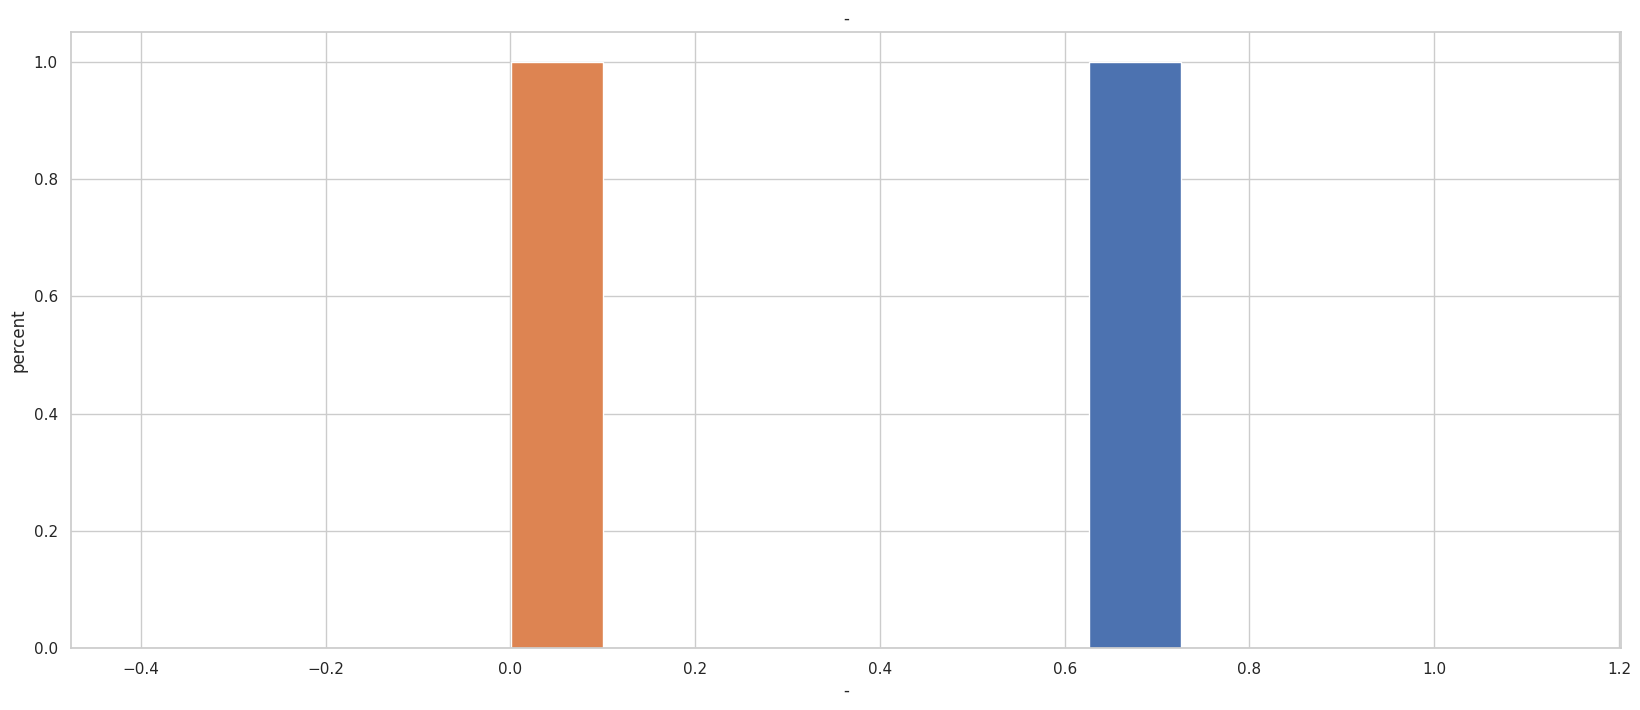

In [131]:
my_bin = 10
plt.hist(accuracy, bins=my_bin)
plt.hist(accuracy2, bins=my_bin)
plt.title("-")
plt.xlabel("-")
plt.ylabel("percent")
plt.show()

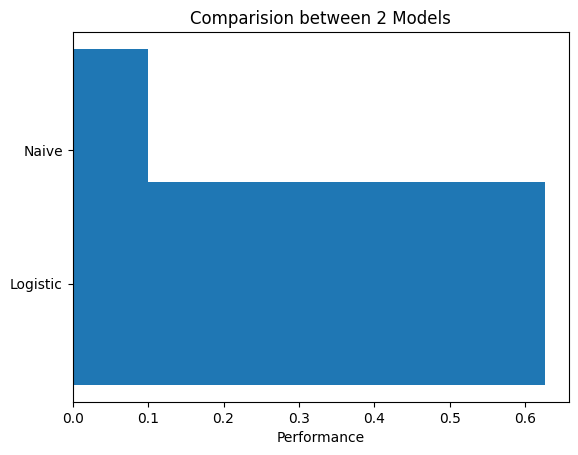

In [148]:
plt.rcdefaults()
fig, ax = plt.subplots()


people = ('Logistic', 'Naive')
y_pos = np.append(accuracy,accuracy2)
performance =  [accuracy,accuracy2]

ax.barh(y_pos, performance)
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  
ax.set_xlabel('Performance')
ax.set_title('Comparision between 2 Models')

plt.show()